In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from statsmodels.tsa.stattools import adfuller

from pmdarima.arima import auto_arima

In [2]:
total_pop = pd.read_excel("west_african_demographics.xlsx", sheet_name = 0)
cbr = pd.read_excel("west_african_demographics.xlsx", sheet_name = 1)
cdr = pd.read_excel("west_african_demographics.xlsx", sheet_name = 2)

In [3]:
def data_transform(df):
    df = df.rename(columns = {'Country Name': ''})    
    df = df.T
    new_header = df.iloc[0]
    df = df[1:]
    df.columns = new_header
    df.index.names = ['Year']
    return df

def save_files(df):
    df = data_transform(df)
    name = input(" Enter name of file! with .csv at the end ")
    df.to_csv(name)

In [4]:
total_pop_1 = pd.read_csv("preprocessed files/total_pop.csv", parse_dates = ['Year'], index_col = 'Year')
cbr_1 = pd.read_csv("preprocessed files/crude_birth_rate.csv", parse_dates = ['Year'], index_col = 'Year')
cdr_1 = pd.read_csv("preprocessed files/crude_death_rate.csv", parse_dates = ['Year'], index_col = 'Year')

### Total Population

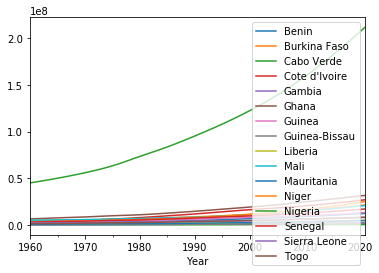

In [5]:
total_pop_1.plot();

In [6]:
total_pop_1.describe()

,Benin,Burkina Faso,Cabo Verde,Cote d'Ivoire,Gambia,Ghana,Guinea,Guinea-Bissau,Liberia,Mali,Mauritania,Niger,Nigeria,Senegal,Sierra Leone,Togo
count,6.200000e+01,6.200000e+01,62.000000,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01
mean,5.920906e+06,1.037753e+07,368019.822581,1.302476e+07,1.110391e+06,1.650012e+07,7.091898e+06,1.095334e+06,2.540196e+06,1.019607e+07,2.301766e+06,1.021862e+07,1.065921e+08,8.431458e+06,4.490203e+06,4.195926e+06
std,3.004535e+06,4.892588e+06,109611.050916,7.096133e+06,6.351193e+05,7.478899e+06,2.921636e+06,4.067367e+05,1.186528e+06,4.509255e+06,1.129300e+06,6.130639e+06,4.864361e+07,4.045562e+06,1.701836e+06,2.050577e+06
min,2.431617e+06,4.829289e+06,201770.000000,3.503559e+06,3.650490e+05,6.635229e+06,3.494164e+06,6.161400e+05,1.118655e+06,5.263727e+06,8.503770e+05,3.388774e+06,4.513846e+07,3.206757e+06,2.317638e+06,1.580508e+06
25%,3.285668e+06,6.184424e+06,271469.000000,6.487794e+06,5.444412e+05,1.003925e+07,4.508246e+06,7.670925e+05,1.611799e+06,6.510892e+06,1.340536e+06,5.222476e+06,6.383606e+07,4.961728e+06,3.053517e+06,2.423944e+06
50%,5.063992e+06,8.930560e+06,342091.000000,1.214364e+07,9.741330e+05,1.499032e+07,6.443609e+06,9.863935e+05,2.109048e+06,8.542722e+06,2.061130e+06,8.157666e+06,9.644004e+07,7.640904e+06,4.306866e+06,3.818654e+06
75%,8.158226e+06,1.372736e+07,467636.750000,1.865481e+07,1.579519e+06,2.223795e+07,9.257962e+06,1.369419e+06,3.301437e+06,1.309641e+07,3.089980e+06,1.401410e+07,1.416200e+08,1.130923e+07,5.783337e+06,5.725072e+06
max,1.245103e+07,2.149710e+07,561901.000000,2.705363e+07,2.486937e+06,3.173213e+07,1.349724e+07,2.015490e+06,5.180208e+06,2.085572e+07,4.775110e+06,2.513081e+07,2.114007e+08,1.719631e+07,8.141343e+06,8.478242e+06


In [7]:
list_1 = []
list_2 = []
list_3 = []
list_4 = []
names = []
for i in total_pop_1.columns: 
    results = adfuller(total_pop_1[i])
    results_2 = adfuller(total_pop_1[i].diff().dropna())
    results_3 = adfuller(total_pop_1[i].diff().diff().dropna())
    results_4 = adfuller(total_pop_1[i].diff().diff().diff().dropna())
    list_1.append(results[1])
    list_2.append(results_2[1])
    list_3.append(results_3[1])
    list_4.append(results_4[1])

    names.append(i)
    
adf_p = pd.DataFrame(
    {'column': names,
     'no_diff': list_1,
     'diff_1': list_2,
     'diff_2':list_3, 
     'diff_3':list_4
    })
adf_p

,column,no_diff,diff_1,diff_2,diff_3
0,Benin,0.984991,0.995954,2.095378e-01,4.111204e-02
1,Burkina Faso,0.129844,0.983069,2.804495e-01,1.903306e-01
2,Cabo Verde,0.993255,0.005613,8.480341e-02,1.064212e-01
3,Cote d'Ivoire,1.000000,0.961130,2.434563e-01,3.517530e-02
4,Gambia,0.997017,0.992445,3.874677e-02,2.142925e-02
5,Ghana,0.993407,0.951932,4.855328e-03,2.441261e-02
6,Guinea,0.999088,0.998039,3.483728e-02,2.497593e-01
7,Guinea-Bissau,1.000000,0.993247,3.742361e-04,2.484145e-04
8,Liberia,0.998886,0.812436,8.404737e-03,2.626531e-03
9,Mali,1.000000,0.992406,5.476865e-01,5.800043e-02


In [8]:
train = total_pop_1['Nigeria'][:-20]
arima_model = auto_arima(train, start_p=0, d=3, start_q=0, max_p=10, max_d=4, max_q=10, seasonal=False,
                        error_action='warn', trace=True, supress_warnings=True, 
                        stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=890.909, Time=0.10 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=916.275, Time=0.32 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=893.173, Time=0.31 sec
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=919.103, Time=0.71 sec
 ARIMA(0,3,0)(0,0,0)[0] intercept   : AIC=892.685, Time=0.13 sec

Best model:  ARIMA(0,3,0)(0,0,0)[0]          
Total fit time: 1.600 seconds


In [11]:
test = total_pop_1['Nigeria'][-20:]
pred = arima_model.predict(n_periods=20)

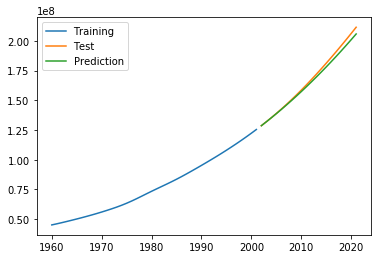

In [12]:
plt.plot(train,label="Training")
plt.plot(test, label="Test")
plt.plot(pred, label="Prediction")
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import r2_score

r2_score(test,pred)

0.9873306873661972

### Crude Birth Rate

In [14]:
list_1 = []
list_2 = []
list_3 = []
list_4 = []
names = []
for i in cbr_1.columns: 
    results = adfuller(cbr_1[i])
    results_2 = adfuller(cbr_1[i].diff().dropna())
    results_3 = adfuller(cbr_1[i].diff().diff().dropna())
    results_4 = adfuller(cbr_1[i].diff().diff().diff().dropna())
    list_1.append(results[1])
    list_2.append(results_2[1])
    list_3.append(results_3[1])
    list_4.append(results_4[1])

    names.append(i)
    
adf_p = pd.DataFrame(
    {'column': names,
     'no_diff': list_1,
     'diff_1': list_2,
     'diff_2':list_3, 
     'diff_3':list_4
    })
adf_p

,column,no_diff,diff_1,diff_2,diff_3
0,Benin,0.612392,0.160284,6.241189e-03,2.551237e-03
1,Burkina Faso,0.840802,0.869071,4.563734e-04,2.696089e-01
2,Cabo Verde,0.986585,0.062996,4.902030e-02,3.743353e-03
3,Cote d'Ivoire,0.774103,0.191176,4.751808e-03,9.857949e-04
4,Gambia,0.998932,0.619574,7.164562e-02,3.113778e-04
5,Ghana,0.996384,0.006244,1.161433e-08,2.581434e-05
6,Guinea,0.897119,0.008733,7.322905e-02,6.879749e-02
7,Guinea-Bissau,0.987339,0.187389,1.207571e-01,9.862627e-05
8,Liberia,0.987726,0.375921,2.387379e-02,1.771286e-06
9,Mali,0.997703,0.173039,2.901312e-02,1.658495e-03


In [15]:
train = total_pop_1['Nigeria'][:-20]
arima_model = auto_arima(train, start_p=0, d=2, start_q=0, max_p=10, max_d=3, max_q=10, seasonal=False,
                        error_action='warn', trace=True, supress_warnings=True, 
                        stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=966.135, Time=0.10 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=1223.077, Time=0.38 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=968.112, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1005.711, Time=0.14 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=2142.878, Time=0.45 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0] intercept
Total fit time: 1.236 seconds


In [16]:
test = total_pop_1[data][-20:]
pred = arima_model.predict(n_periods=20)

NameError: name 'data' is not defined

In [ ]:
plt.plot(train,label="Training")
plt.plot(test, label="Test")
plt.plot(pred, label="Prediction")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score

r2_score(test,pred)

### Crude Death Rate

In [17]:
cdr_1.tail()
cdr_1 = cdr_1.iloc[:-1, :]

In [18]:
list_1 = []
list_2 = []
list_3 = []
list_4 = []
names = []
for i in cdr_1.columns: 
    results = adfuller(cdr_1[i])
    results_2 = adfuller(cdr_1[i].diff().dropna())
    results_3 = adfuller(cdr_1[i].diff().diff().dropna())
    results_4 = adfuller(cdr_1[i].diff().diff().diff().dropna())
    list_1.append(results[1])
    list_2.append(results_2[1])
    list_3.append(results_3[1])
    list_4.append(results_4[1])

    names.append(i)
    
adf_p = pd.DataFrame(
    {'column': names,
     'no_diff': list_1,
     'diff_1': list_2,
     'diff_2':list_3, 
     'diff_3':list_4
    })
adf_p

,column,no_diff,diff_1,diff_2,diff_3
0,Benin,0.011863,0.794732,0.052990,3.963427e-07
1,Burkina Faso,0.576958,0.061906,0.008801,2.518175e-04
2,Cabo Verde,0.000227,0.589654,0.001906,9.590091e-02
3,Cote d'Ivoire,0.143999,0.602551,0.003135,5.562904e-03
4,Gambia,0.001178,0.147938,0.034515,1.142970e-04
5,Ghana,0.024076,0.614682,0.050619,2.169664e-03
6,Guinea,0.677253,0.001950,0.011405,2.806234e-05
7,Guinea-Bissau,0.529860,0.461720,0.184850,2.489548e-01
8,Liberia,0.893325,0.010251,0.069437,1.960166e-06
9,Mali,0.310863,0.087442,0.210714,2.686054e-05


In [ ]:
train = total_pop_1['Nigeria'][:-20]
arima_model = auto_arima(train, start_p=0, d=2, start_q=0, max_p=10, max_d=3, max_q=10, seasonal=False,
                        error_action='warn', trace=True, supress_warnings=True, 
                        stepwise=True, random_state=20, n_fits=50)

In [ ]:
test = total_pop_1['Nigeria'][-20:]
pred = arima_model.predict(n_periods=20)

In [ ]:
plt.plot(train,label="Training")
plt.plot(test, label="Test")
plt.plot(pred, label="Prediction")
plt.legend()
plt.show()

In [ ]:
r2_score(test,pred)